In [ ]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models._utils import _ovewrite_named_param, handle_legacy_interface

In [ ]:
COCO_LABELS = [
    'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
    'boat', 'traffic light', 'fire hydrant','none', 'stop sign', 'parking meter', 'bench', 'bird',
    'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'none', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'none',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl','none', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot','none', 'hot dog', 'pizza', 'donut', 'cake','none', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'none', 'tv', 'laptop', 'mouse', 'remote', 'keyboard','none', 'cell phone','none', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator','none', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)
model.eval()


RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


Detected dog, index 18 with confidence 0.92.


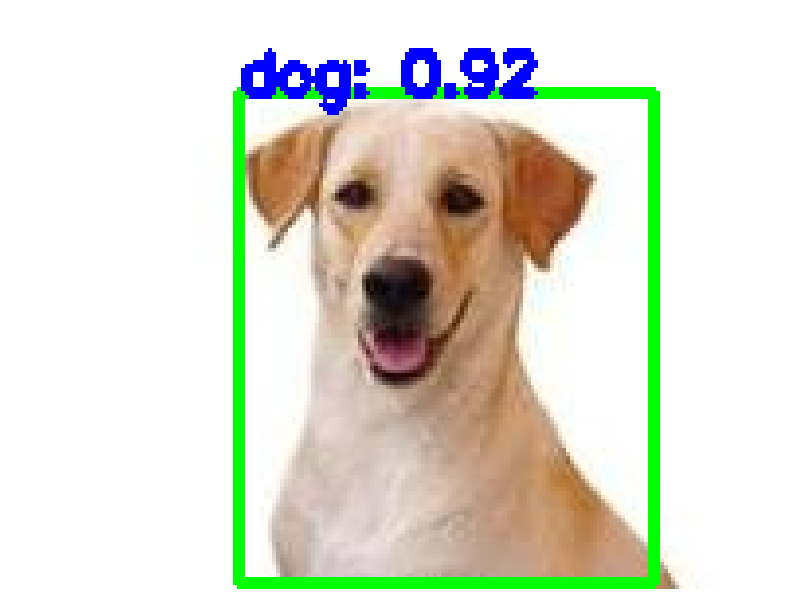

In [ ]:

def detect_objects(image_path, confidence_threshold=0.5):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image exists.")
        return None

    original_image = image.copy()
    # Convert the image to a tensor and normalize it
    image_tensor = F.to_tensor(image).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        predictions = model(image_tensor)

    # Extract boxes, labels, and scores
    boxes = predictions[0]['boxes'].numpy()
    labels = predictions[0]['labels'].numpy()
    scores = predictions[0]['scores'].numpy()

    # Loop through the predictions and filter by confidence score
    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_LABELS[labels[i]]
            print(f"Detected {label}, index {labels[i]} with confidence {scores[i]:.2f}.")
            score = scores[i]

            # Get bounding box coordinates
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return original_image

if __name__ == "__main__":
    IMAGE_PATH = "/content/dog.jpg"
    result_image = detect_objects(IMAGE_PATH)

    if result_image is not None:
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print("Image loading failed. Please check the image path.")


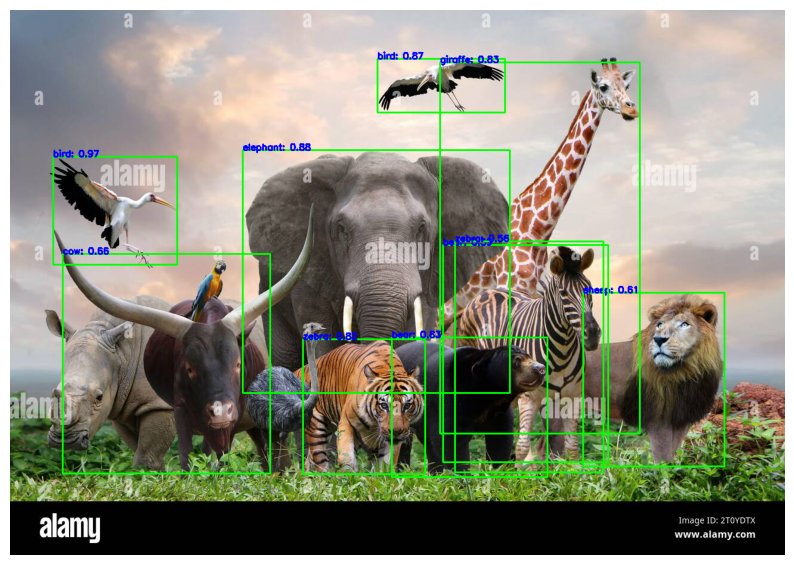

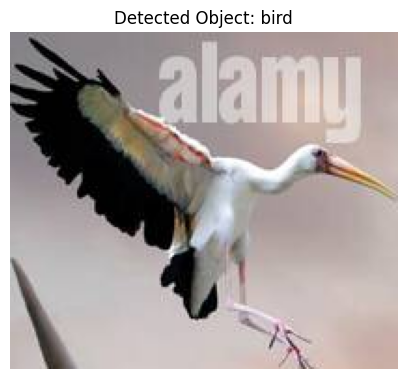

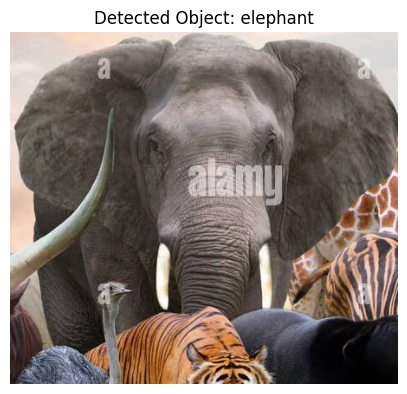

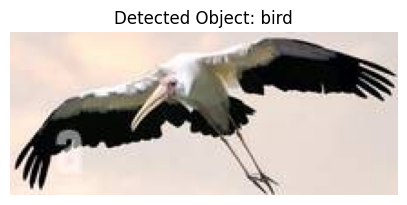

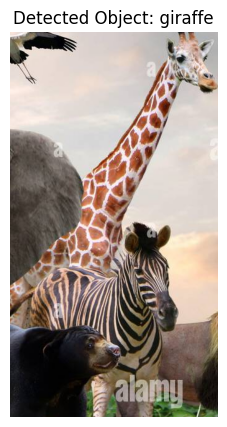

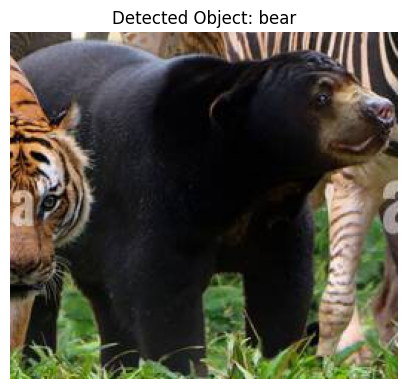

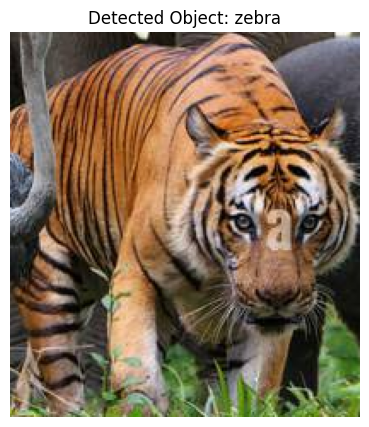

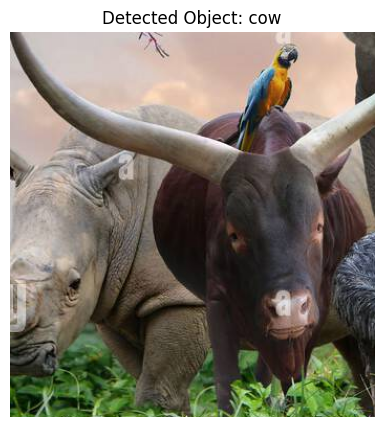

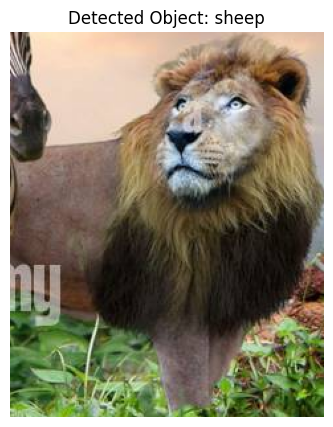

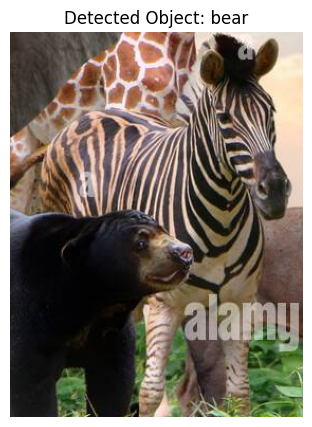

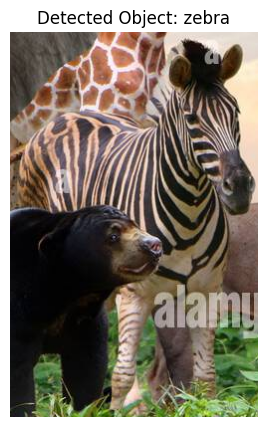

In [ ]:
def detect_objects(image_path, confidence_threshold=0.5):
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image exists.")
        return None, None, None

    original_image = image.copy()
    cropped_unchanged_images = []
    coppy_img = image.copy()
    coppy_images = []
    object_labels = []

    image_tensor = F.to_tensor(image).unsqueeze(0)

    with torch.no_grad():
        predictions = model(image_tensor)

    boxes = predictions[0]['boxes'].numpy()
    labels = predictions[0]['labels'].numpy()
    scores = predictions[0]['scores'].numpy()

    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_LABELS[labels[i]]
            object_labels.append(label)
            score = scores[i]

            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))

            cropped_image = original_image[start_point[1]:end_point[1], start_point[0]:end_point[0]]
            cropped_unchanged_images.append(cropped_image)  # Append cropped image without any modifications
            coppy_image = coppy_img[start_point[1]:end_point[1], start_point[0]:end_point[0]]
            coppy_images.append(coppy_image)

            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return original_image, coppy_images, object_labels
def display_individual_boxes(cropped_images, object_labels):

    for i, cropped_image in enumerate(cropped_images):
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
        plt.title(f"Detected Object: {object_labels[i]}")
        plt.axis('off')
        plt.show()


if __name__ == "__main__":
    IMAGE_PATH = "/content/animals.jpg"
    result_image, cropped_unchanged_images, object_labels = detect_objects(IMAGE_PATH)

    if result_image is not None:

        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
        plt.axis('off')
        plt.show()

        if cropped_unchanged_images:
            display_individual_boxes(cropped_unchanged_images, object_labels)
    else:
        print("Image loading failed. Please check the image path.")